<a href="https://colab.research.google.com/github/BirenderPanwar/EVA4_Phase1/blob/master/session7/EVA4S7_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
!ls -ltr
!hostname -i

total 166748
drwxr-xr-x 2 jd jd      4096 Jun  5  2009 cifar-10-batches-py
-rw-rw-r-- 1 jd jd      2759 May 26 17:28 tmp.md
-rw-rw-r-- 1 jd jd       443 May 26 17:28 regularization.py
-rw-rw-r-- 1 jd jd     46585 Sep 11 21:04 S7.ipynb
drwxr-xr-x 2 jd jd      4096 Sep 12 19:42 data
-rw-rw-r-- 1 jd jd      3109 Sep 12 19:52 data_utils.py
-rw-r--r-- 1 jd jd 170498071 Sep 12 19:54 cifar-10-python.tar.gz
-rw-rw-r-- 1 jd jd      4788 Sep 12 20:19 plot_utils.py
-rw-rw-r-- 1 jd jd      9186 Sep 12 20:24 cifar10_net.py
-rw-rw-r-- 1 jd jd      9276 Sep 12 22:18 model_utils.py
-rw-rw-r-- 1 jd jd    129146 Sep 12 22:21 EVA5_secession_7.ipynb
drwxr-xr-x 2 jd jd      4096 Sep 12 22:21 __pycache__
-rw-r--r-- 1 jd jd      4679 Sep 12 22:22 model_cifar.py
127.0.1.1


# Loading UD modules

In [3]:
import pandas as pd
import numpy as np 

import torch
import data_utils as dutils   # utilities for dataset, transform, dataloaders
import model_utils as mutils  # utilities for basic conv block, depthwise seperable blocks, train, test, build fucntions
import plot_utils as putils   # utilities for ploting images, model history, misclassified images etc
import regularization         # L1 loss fxn
import model_cifar          # CIFAR10 network design

import matplotlib.pyplot as plt
import seaborn as sns

import os

# Check GPU avaiability

In [4]:
device = dutils.get_device()

CUDA Available? True
Device is cuda:0


In [5]:
device.type

'cuda'

In [6]:
cuda = torch.cuda.is_available()

In [7]:
cuda

True

# CIFAR10 Basics

In [8]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=128

# CUDA?
if device.type == 'cuda':
    torch.cuda.manual_seed(SEED)
else:
    torch.manual_seed(SEED)

# Load CIFAR10 dataset

In [9]:
os.getcwd()

'/home/jd/Desktop/SECESSION7'

In [10]:
path = os.getcwd()
path

'/home/jd/Desktop/SECESSION7'

In [11]:
# load CIFAR10 dataset
train_loader, test_loader = dutils.get_dataloader(batch_size=batch_size, num_workers=4, cuda = True,path = path )

Running over Cuda !!  True
Files already downloaded and verified
Files already downloaded and verified


# Data mage Visualization

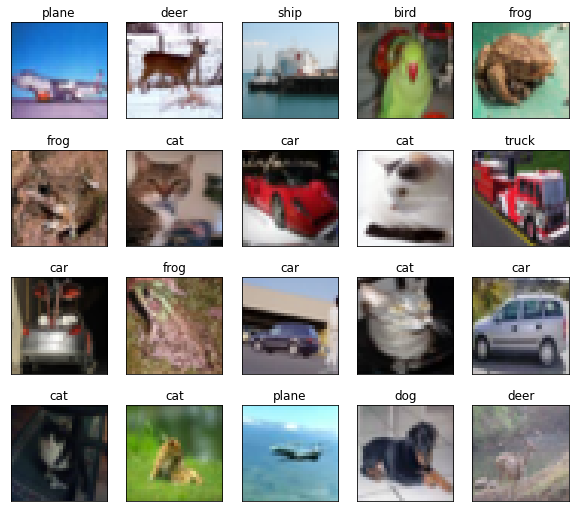

In [12]:
#Plot 20 random images
putils.plot_dataset_images(device, classes, train_loader)

### Model stracture

In [13]:
# Create CIFAR10 network
model = model_cifar.Net(dropout_value = 0.05)
mutils.model_summary(model, device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
           Dropout-3           [-1, 32, 32, 32]               0
              ReLU-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]             576
            Conv2d-6           [-1, 32, 32, 32]           2,048
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
              ReLU-9           [-1, 32, 32, 32]               0
        MaxPool2d-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          18,432
      BatchNorm2d-12           [-1, 64, 16, 16]             128
          Dropout-13           [-1, 64, 16, 16]               0
             ReLU-14           [-1, 64,

# Build and train model

In [14]:
# build and train the model
model_name = "Model CIFAR10"
EPOCHS = 40
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = mutils.build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=True,
                                                            L2_penalty_val=0.001)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


/home/jd/anaconda3/envs/eva5/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.135850, Accuracy: 5894/10000 (58.94%)

EPOCH: 1


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.005993, Accuracy: 6535/10000 (65.35%)

EPOCH: 2


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.849671, Accuracy: 7019/10000 (70.19%)

EPOCH: 3


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.038781, Accuracy: 6460/10000 (64.60%)

EPOCH: 4


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.850388, Accuracy: 7029/10000 (70.29%)

EPOCH: 5


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.025418, Accuracy: 6444/10000 (64.44%)

EPOCH: 6


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.745053, Accuracy: 7442/10000 (74.42%)

EPOCH: 7


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.785872, Accuracy: 7369/10000 (73.69%)

EPOCH: 8


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.475662, Accuracy: 8397/10000 (83.97%)

EPOCH: 9


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.453535, Accuracy: 8469/10000 (84.69%)

EPOCH: 10


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.463728, Accuracy: 8457/10000 (84.57%)

EPOCH: 11


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.447720, Accuracy: 8503/10000 (85.03%)

EPOCH: 12


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.480988, Accuracy: 8384/10000 (83.84%)

EPOCH: 13


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.496525, Accuracy: 8341/10000 (83.41%)

EPOCH: 14


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.468621, Accuracy: 8431/10000 (84.31%)

EPOCH: 15


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.492237, Accuracy: 8376/10000 (83.76%)

EPOCH: 16


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.422853, Accuracy: 8614/10000 (86.14%)

EPOCH: 17


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.426824, Accuracy: 8626/10000 (86.26%)

EPOCH: 18


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.426096, Accuracy: 8623/10000 (86.23%)

EPOCH: 19


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.428948, Accuracy: 8621/10000 (86.21%)

EPOCH: 20


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.434394, Accuracy: 8608/10000 (86.08%)

EPOCH: 21


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.440595, Accuracy: 8617/10000 (86.17%)

EPOCH: 22


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.438587, Accuracy: 8613/10000 (86.13%)

EPOCH: 23


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.441789, Accuracy: 8604/10000 (86.04%)

EPOCH: 24


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.437438, Accuracy: 8615/10000 (86.15%)

EPOCH: 25


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.440854, Accuracy: 8610/10000 (86.10%)

EPOCH: 26


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.435924, Accuracy: 8626/10000 (86.26%)

EPOCH: 27


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.437186, Accuracy: 8612/10000 (86.12%)

EPOCH: 28


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.438371, Accuracy: 8608/10000 (86.08%)

EPOCH: 29


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.441200, Accuracy: 8611/10000 (86.11%)

EPOCH: 30


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.444565, Accuracy: 8613/10000 (86.13%)

EPOCH: 31


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.442597, Accuracy: 8607/10000 (86.07%)

EPOCH: 32


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.440209, Accuracy: 8626/10000 (86.26%)

EPOCH: 33


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.438730, Accuracy: 8622/10000 (86.22%)

EPOCH: 34


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.446321, Accuracy: 8619/10000 (86.19%)

EPOCH: 35


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.440534, Accuracy: 8618/10000 (86.18%)

EPOCH: 36


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.444527, Accuracy: 8609/10000 (86.09%)

EPOCH: 37


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.438814, Accuracy: 8610/10000 (86.10%)

EPOCH: 38


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.455770, Accuracy: 8613/10000 (86.13%)

EPOCH: 39


Loss=0.133317 Batch_id=390 Accuracy=97.07: 100%|██████████| 391/391 [01:20<00:00,  4.86it/s]



Test set: Average loss: 0.442330, Accuracy: 8618/10000 (86.18%)



# Test Accuracy

In [15]:
mutils.get_test_accuracy(model, device, test_loader)


Accuracy of the network on the 10000 test images: 86.18%



### Class level Accuracy

In [16]:

mutils.class_based_accuracy(model, device, classes, test_loader)

Accuracy of plane : 100 %
Accuracy of   car : 93 %
Accuracy of  bird : 79 %
Accuracy of   cat : 80 %
Accuracy of  deer : 83 %
Accuracy of   dog : 88 %
Accuracy of  frog : 89 %
Accuracy of horse : 100 %
Accuracy of  ship : 96 %
Accuracy of truck : 94 %


# Visualization


Ploting Accuracy and Loss history: Model CIFAR10



/home/jd/Desktop/SECESSION7/plot_utils.py:34: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,x_size+1),x_size/10)
/home/jd/Desktop/SECESSION7/plot_utils.py:45: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,x_size+1),x_size/10)


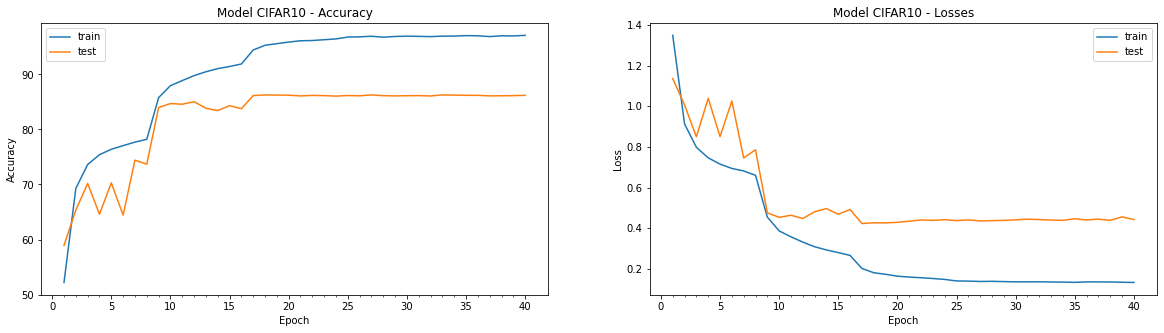

In [17]:
print("\nPloting Accuracy and Loss history: {}\n".format(model_name))
putils.plot_model_history(model_name, 
                   train_acc,test_acc,
                   train_losses,test_losses,
                   save_filename = "model_history")

# Misclassified images


Ploting misclassified images: Model CIFAR10



/home/jd/Desktop/SECESSION7/plot_utils.py:92: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629395347/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  wrong_idx = (pred_marker == False).nonzero()  # get indices for wrong predictions


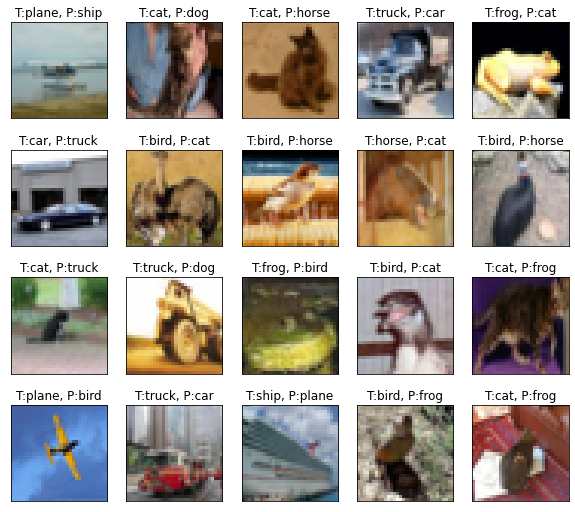

In [18]:
print("\nPloting misclassified images: {}\n".format(model_name))
putils.plot_misclassified_images(model, 
                          device, 
                          classes,
                          testloader=test_loader,
                          save_filename="model_misclassified")